In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import operator
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
import tensorflow as tf
import zipfile
import os
import PIL
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
import random
from stardist.models import StarDist2D
#from keras_unet_collection import models
import keras
import skimage
from sklearn.cluster import KMeans
import scipy
from PIL import Image
import statistics
import math
import copy
import scipy.stats as stats
import SimpleITK as Sitk
import numba
from numba import njit
import scipy.ndimage as ndimage
import scipy.ndimage as ndi
from skimage import measure
import multiprocessing
from multiprocessing import Pool
from aicsimageio import AICSImage
import matplotlib.pyplot as plt
#import numpy as np
import math
from PIL import Image
import cv2
import skimage
import sklearn
from skimage.filters import threshold_multiotsu
from numba import jit, cuda
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import GlobalAveragePooling2D
from keras import layers
from tensorflow.keras.applications import VGG16
import dill
from skimage.morphology import disk
import pickle
from matplotlib.colors import LinearSegmentedColormap
from aicsimageio import AICSImage
import multiprocessing
from sklearn.utils import class_weight
import tifffile

2026-01-14 21:52:08.175015: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768427528.199048  190073 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768427528.206432  190073 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768427528.225686  190073 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768427528.225719  190073 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768427528.225723  190073 computation_placer.cc:177] computation placer alr

In [2]:
dill.load_session("/scratch/c.c23115040/HealthyvsGleason45_Final.pkl")

2026-01-14 21:52:37.397107: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [30]:
dill.dump_session("/scratch/c.c23115040/HealthyvsGleason45_Final2.pkl")

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def scaled(x):
    sc = (x - np.mean(x))/np.std(x)
    return sc

In [4]:
lst = open("/scratch/c.c23115040/TMA Data/TMA Data/list.txt", "r")
lst = lst.read()
lst = lst.split("\n")
list2 = []
for i in range(len(lst)):
    if lst[i][12:15] == '0.6':
        list2.append(lst[i])
lst = list2    

list_ann = open("/scratch/c.c23115040/H&E_Annotated/list.txt", "r")
list_ann = list_ann.read()
list_ann = list_ann.split("\n")

list_char = []
list_char_ann = []

for i in range(len(lst)):
    list_char.append(lst[i][0:3])

for i in range(len(list_ann)):
    list_char_ann.append(list_ann[i][0:3])
    
labels = [i for i, item in enumerate(list_char) if item in set(list_char_ann)]

lst = operator.itemgetter(*labels)(lst)

In [5]:
lst2 = open("/scratch/c.c23115040/AMW/list.txt", "r")
lst2 = lst2.read()
lst2 = lst2.split("\n")

list_ann2 = open("/scratch/c.c23115040/H&E_Annotated2/list.txt", "r")
list_ann2 = list_ann2.read()
list_ann2 = list_ann2.split("\n")

list_char2 = []
list_char_ann2 = []

for i in range(len(lst2)):
    list_char2.append(lst2[i][12:14])

for i in range(len(list_ann2)):
    list_char_ann2.append(list_ann2[i][4:6])
    
labels2 = [i for i, item in enumerate(list_char2) if item in set(list_char_ann2)]

lst2 = operator.itemgetter(*labels2)(lst2)

In [6]:
lst3 = open("/scratch/c.c23115040/WCB_Sequential/list.txt", "r")
lst3 = lst3.read()
lst3 = lst3.split("\n")

list_ann3 = open("/scratch/c.c23115040/WCB_Sequential_Annotated/list.txt", "r")
list_ann3 = list_ann3.read()
list_ann3 = list_ann3.split("\n")

list_char3 = []
list_char_ann3 = []

for i in range(len(lst3)):
    list_char3.append(lst3[i][7:10])

for i in range(len(list_ann3)):
    list_char_ann3.append(list_ann3[i][7:10])
    
labels3 = [i for i, item in enumerate(list_char3) if item in set(list_char_ann3)]

lst3 = operator.itemgetter(*labels3)(lst3)

In [7]:
patient_list = pd.read_excel('patient_wise_list.xlsx', header = None)
patient_list1 = np.asarray(patient_list.iloc[:,0])
patient_list2 = np.asarray(patient_list.iloc[:,1], dtype = 'str')
patient_list3 = np.asarray(patient_list.iloc[:,2])
patient_list3 = patient_list3 - 1

In [8]:
epithelials = np.load("/home/c.c23115040/epithelials.npy", allow_pickle=True)
epithelials = operator.itemgetter(*labels)(epithelials)

In [9]:
epithelials2 = np.load("/home/c.c23115040/epithelials2.npy", allow_pickle=True)
epithelials2 = operator.itemgetter(*labels2)(epithelials2)

In [10]:
epithelials3 = np.load("/home/c.c23115040/epithelials3.npy", allow_pickle=True)
epithelials3 = operator.itemgetter(*labels3)(epithelials3)

In [11]:
full_masks = np.load("/home/c.c23115040/full_masks.npy", allow_pickle=True)

In [12]:
full_masks2 = np.load("/home/c.c23115040/full_masks2.npy", allow_pickle=True)

In [13]:
full_masks3 = np.load("/home/c.c23115040/full_masks3.npy", allow_pickle=True)

In [14]:
sz = 356
cr = int(np.floor(4095/sz))

for i in range(len(epithelials)):
    full_masks[i][epithelials[i] == 0] = 0
    
full_masks_resized = []

for k in range(len(full_masks)):
    full = np.zeros((cr, cr))
    for i in range(cr):
        for j in range(cr):
            distr = full_masks[k][sz*i:(sz*i+sz), sz*j:(sz*j+sz)].flatten().astype(int)
            distr2 = distr[distr != 0].copy()
            if len(distr2) == 0:
                full[i, j] = 0
            else:
                mx = np.argmax(np.bincount(distr2))
                if (np.bincount(distr2)[mx]/sum(np.bincount(distr2))) > 0.75 and (sum(np.bincount(distr2))/(sz*sz)) > 0.15:
                    full[i, j] = mx
                else:
                    full[i, j] = 0
    full_masks_resized.append(full)        

In [15]:
sz = 471
cr = int(np.floor(5119/sz))

for i in range(len(epithelials2)):
    full_masks2[i][epithelials2[i] == 0] = 0

for k in range(len(full_masks2)):
    full = np.zeros((cr, cr))
    for i in range(cr):
        for j in range(cr):
            distr = full_masks2[k][sz*i:(sz*i+sz), sz*j:(sz*j+sz)].flatten().astype(int)
            distr2 = distr[distr != 0].copy()
            if len(distr2) == 0:
                full[i, j] = 0
            else:
                mx = np.argmax(np.bincount(distr2))
                if (np.bincount(distr2)[mx]/sum(np.bincount(distr2))) > 0.75 and (sum(np.bincount(distr2))/(sz*sz)) > 0.15:
                    full[i, j] = mx
                else:
                    full[i, j] = 0
    full_masks_resized.append(full)        

In [16]:
sz = 471
cr = int(np.floor(2047/sz))

for i in range(len(epithelials3)):
    full_masks3[i][epithelials3[i] == 0] = 0

for k in range(len(full_masks3)):
    full = np.zeros((cr, cr))
    for i in range(cr):
        for j in range(cr):
            c_x = int(i - (cr/2))
            c_y = int(j - (cr/2))
            i_x = int(2047/2 + c_x*sz)
            f_x = int(2047/2 + (c_x+1)*sz)
            i_y = int(2047/2 + c_y*sz)
            f_y = int(2047/2 + (c_y+1)*sz)
            distr = full_masks3[k][i_x:f_x, i_y:f_y].flatten().astype(int)
            distr2 = distr[distr != 0].copy()
            if len(distr2) == 0:
                full[i, j] = 0
            else:
                mx = np.argmax(np.bincount(distr2))
                if (np.bincount(distr2)[mx]/sum(np.bincount(distr2))) > 0.75 and (sum(np.bincount(distr2))/(sz*sz)) > 0.15:
                    full[i, j] = mx
                else:
                    full[i, j] = 0
    full_masks_resized.append(full)        

In [17]:
DRAQ5_input = []
Eosin_input = []
classif = []
batch = []

sz = 356
cr = int(np.floor(4095/sz))

for k in range(len(lst)):
    img = cv2.imread("/scratch/c.c23115040/TMA Data/TMA Data/" + lst[k] + "_DRAQ5.tiff", cv2.IMREAD_UNCHANGED)
    DRAQ5 = img
    DRAQ5 = 4095*skimage.exposure.equalize_adapthist(DRAQ5, nbins = 4095)
    img = cv2.imread("/scratch/c.c23115040/TMA Data/TMA Data/" + lst[k] + "_Eosin.tiff", cv2.IMREAD_UNCHANGED)
    Eosin = img
    Eosin = 4095*skimage.exposure.equalize_adapthist(Eosin, nbins = 4095)
    mask_gleason = full_masks_resized[k]

    DRAQ5_crop = np.zeros((cr, cr, sz, sz, 1))
    Eosin_crop = np.zeros((cr, cr, sz, sz, 1))
    for i in range(cr):
        for j in range(cr):
            DRAQ5_crop[i, j, :, :, 0] = DRAQ5[sz*i:(sz*i+sz), sz*j:(sz*j+sz)]
            Eosin_crop[i, j, :, :, 0] = Eosin[sz*i:(sz*i+sz), sz*j:(sz*j+sz)]
            
    for i in range(cr):
        for j in range(cr):
            mask = mask_gleason[i,j].copy()
            if mask == 0:
                continue
            roi_DRAQ5 = DRAQ5_crop[i, j, :, :, 0].copy()
            roi_Eosin = Eosin_crop[i, j, :, :, 0].copy()
            roi_DRAQ5 = cv2.resize(roi_DRAQ5, (256,256), fx=0, fy=0, interpolation = cv2.INTER_NEAREST)
            roi_Eosin = cv2.resize(roi_Eosin, (256,256), fx=0, fy=0, interpolation = cv2.INTER_NEAREST)
            roi_DRAQ5 = scaled(roi_DRAQ5)
            roi_Eosin = scaled(roi_Eosin)
            DRAQ5_input.append(roi_DRAQ5)
            Eosin_input.append(roi_Eosin)
            classif.append(mask)
            batch.append(patient_list3[np.where(patient_list1 == lst[k][0:3])[0][0]])

In [18]:
sz = 471
cr = int(np.floor(5119/sz))

for k in range(len(lst2)):
    img = cv2.imread("/scratch/c.c23115040/AMW/" + lst2[k] + "DRAQ5.tiff", cv2.IMREAD_UNCHANGED)
    DRAQ5 = img
    DRAQ5 = 4095*skimage.exposure.equalize_adapthist(DRAQ5, nbins = 4095)
    img = cv2.imread("/scratch/c.c23115040/AMW/" + lst2[k] + "Eosin.tiff", cv2.IMREAD_UNCHANGED)
    Eosin = img
    Eosin = 4095*skimage.exposure.equalize_adapthist(Eosin, nbins = 4095)
    mask_gleason = full_masks_resized[len(lst) + k]

    DRAQ5_crop = np.zeros((cr, cr, sz, sz, 1))
    Eosin_crop = np.zeros((cr, cr, sz, sz, 1))
    for i in range(cr):
        for j in range(cr):
            DRAQ5_crop[i, j, :, :, 0] = DRAQ5[sz*i:(sz*i+sz), sz*j:(sz*j+sz)]
            Eosin_crop[i, j, :, :, 0] = Eosin[sz*i:(sz*i+sz), sz*j:(sz*j+sz)]
            
    for i in range(cr):
        for j in range(cr):
            mask = mask_gleason[i,j].copy()
            if mask == 0:
                continue
            roi_DRAQ5 = DRAQ5_crop[i, j, :, :, 0].copy()
            roi_Eosin = Eosin_crop[i, j, :, :, 0].copy()
            roi_DRAQ5 = cv2.resize(roi_DRAQ5, (256,256), fx=0, fy=0, interpolation = cv2.INTER_NEAREST)
            roi_Eosin = cv2.resize(roi_Eosin, (256,256), fx=0, fy=0, interpolation = cv2.INTER_NEAREST)
            roi_DRAQ5 = scaled(roi_DRAQ5)
            roi_Eosin = scaled(roi_Eosin)
            DRAQ5_input.append(roi_DRAQ5)
            Eosin_input.append(roi_Eosin)
            classif.append(mask)
            batch.append(patient_list3[np.where(patient_list2 == lst2[k][12:14])[0][0]])

In [19]:
sz = 471
cr = int(np.floor(2047/sz))

for k in range(len(lst3)):
    img = cv2.imread("/scratch/c.c23115040/WCB_Sequential/" + lst3[k] + "DRAQ5.tiff", cv2.IMREAD_UNCHANGED)
    DRAQ5 = img
    DRAQ5 = 4095*skimage.exposure.equalize_adapthist(DRAQ5, nbins = 4095)
    img = cv2.imread("/scratch/c.c23115040/WCB_Sequential/" + lst3[k] + "Eosin.tiff", cv2.IMREAD_UNCHANGED)
    Eosin = img
    Eosin = 4095*skimage.exposure.equalize_adapthist(Eosin, nbins = 4095)
    mask_gleason = full_masks_resized[len(lst) + len(lst2) + k]

    DRAQ5_crop = np.zeros((cr, cr, sz, sz, 1))
    Eosin_crop = np.zeros((cr, cr, sz, sz, 1))
    for i in range(cr):
        for j in range(cr):
            c_x = int(i - (cr/2))
            c_y = int(j - (cr/2))
            i_x = int(2047/2 + c_x*sz)
            f_x = int(2047/2 + (c_x+1)*sz)
            i_y = int(2047/2 + c_y*sz)
            f_y = int(2047/2 + (c_y+1)*sz)
            DRAQ5_crop[i, j, :, :, 0] = DRAQ5[i_x:f_x, i_y:f_y]
            Eosin_crop[i, j, :, :, 0] = Eosin[i_x:f_x, i_y:f_y]
            
    for i in range(cr):
        for j in range(cr):
            mask = mask_gleason[i,j].copy()
            if mask == 0:
                continue
            roi_DRAQ5 = DRAQ5_crop[i, j, :, :, 0].copy()
            roi_Eosin = Eosin_crop[i, j, :, :, 0].copy()
            roi_DRAQ5 = cv2.resize(roi_DRAQ5, (256,256), fx=0, fy=0, interpolation = cv2.INTER_NEAREST)
            roi_Eosin = cv2.resize(roi_Eosin, (256,256), fx=0, fy=0, interpolation = cv2.INTER_NEAREST)
            roi_DRAQ5 = scaled(roi_DRAQ5)
            roi_Eosin = scaled(roi_Eosin)
            DRAQ5_input.append(roi_DRAQ5)
            Eosin_input.append(roi_Eosin)
            classif.append(mask)
            batch.append(49 + k)

In [20]:
classif = np.array(classif)

In [21]:
batch = np.array(batch)

In [22]:
healthy = np.where(classif == 1)[0]
gleason3 = np.where(classif == 2)[0]
gleason4 = np.where(classif == 3)[0]
cribriform = np.where(classif == 4)[0]
glomeruloid = np.where(classif == 5)[0]
gleason5 = np.where(classif == 6)[0]
gleason4_merg = np.concatenate((gleason4, cribriform, glomeruloid))
gleason_disease = np.concatenate((gleason4, cribriform, glomeruloid, gleason5))

In [23]:
batch_h = batch[classif == 1]
batch_3 = batch[classif == 2]
batch_4 = batch[classif == 3]
batch_c = batch[classif == 4]
batch_g = batch[classif == 5]
batch_5 = batch[classif == 6]
batch_m = np.concatenate((batch_4, batch_c, batch_g))
batch_d = np.concatenate((batch_4, batch_c, batch_g, batch_5))

In [24]:
h = []
g45 = []
#d = []
for k in range(49+len(lst3)):
    h.append(sum(classif[batch == k] == 1))
    g45.append(sum(classif[batch == k] > 2))
    #d.append(sum(sum(full_masks_resized[k] > 2)))
    
d = {'h': h, 'g45': g45}

In [25]:
df = np.asarray(pd.DataFrame(data=d))

In [26]:
m = []
qq = []
for q in range(1000):
    li = list(range(49+len(lst3)))
    random.shuffle(li)
    qte = []
    for i in range(0, 49+len(lst3), (49+len(lst3))//5):
        qte.append(li[i:i+25])
    f1 = (sum(df[qte[0],0]))/(sum(df[qte[0],1]))
    f2 = (sum(df[qte[1],0]))/(sum(df[qte[1],1]))
    f3 = (sum(df[qte[2],0]))/(sum(df[qte[2],1]))
    f4 = (sum(df[qte[3],0]))/(sum(df[qte[3],1]))
    f5 = (sum(df[qte[4],0]))/(sum(df[qte[4],1])) 
    try:
        m.append(sklearn.metrics.mean_squared_error([f1, f2, f3, f4, f5], [1, 1, 1, 1, 1]))
    except:
        continue
    qq.append(qte)

In [27]:
qte = qq[np.argmin(m)]

In [28]:
qte 

[[90,
  13,
  58,
  88,
  47,
  119,
  27,
  0,
  120,
  38,
  70,
  54,
  63,
  124,
  117,
  39,
  71,
  102,
  49,
  1,
  64,
  121,
  108,
  111,
  113],
 [55,
  57,
  26,
  5,
  122,
  73,
  87,
  56,
  86,
  3,
  91,
  23,
  53,
  18,
  82,
  25,
  62,
  101,
  92,
  110,
  72,
  123,
  43,
  7,
  22],
 [2,
  41,
  29,
  6,
  107,
  77,
  125,
  36,
  99,
  85,
  45,
  14,
  68,
  52,
  114,
  37,
  66,
  40,
  100,
  9,
  28,
  97,
  67,
  89,
  61],
 [51,
  31,
  24,
  32,
  44,
  98,
  15,
  79,
  118,
  74,
  109,
  4,
  8,
  48,
  106,
  105,
  80,
  20,
  65,
  104,
  93,
  33,
  83,
  81,
  50],
 [94,
  10,
  60,
  30,
  78,
  126,
  34,
  59,
  42,
  12,
  115,
  11,
  84,
  16,
  96,
  112,
  116,
  19,
  75,
  17,
  95,
  46,
  35,
  76,
  21],
 [103, 69]]

In [29]:
qte[4].append(qte[5][0])
qte[4].append(qte[5][1])
qte = qte[0:5]

In [30]:
qte

[[90,
  13,
  58,
  88,
  47,
  119,
  27,
  0,
  120,
  38,
  70,
  54,
  63,
  124,
  117,
  39,
  71,
  102,
  49,
  1,
  64,
  121,
  108,
  111,
  113],
 [55,
  57,
  26,
  5,
  122,
  73,
  87,
  56,
  86,
  3,
  91,
  23,
  53,
  18,
  82,
  25,
  62,
  101,
  92,
  110,
  72,
  123,
  43,
  7,
  22],
 [2,
  41,
  29,
  6,
  107,
  77,
  125,
  36,
  99,
  85,
  45,
  14,
  68,
  52,
  114,
  37,
  66,
  40,
  100,
  9,
  28,
  97,
  67,
  89,
  61],
 [51,
  31,
  24,
  32,
  44,
  98,
  15,
  79,
  118,
  74,
  109,
  4,
  8,
  48,
  106,
  105,
  80,
  20,
  65,
  104,
  93,
  33,
  83,
  81,
  50],
 [94,
  10,
  60,
  30,
  78,
  126,
  34,
  59,
  42,
  12,
  115,
  11,
  84,
  16,
  96,
  112,
  116,
  19,
  75,
  17,
  95,
  46,
  35,
  76,
  21,
  103,
  69]]

In [31]:
classif2 = np.concatenate((np.full((healthy.shape[0], 1), 0), np.full((gleason_disease.shape[0], 1), 1)))

In [32]:
data = np.concatenate((healthy, gleason_disease))

In [33]:
batch2 = np.concatenate((batch_h, batch_d))

In [34]:
data = data[:, np.newaxis]

In [35]:
data = np.concatenate((data, classif2, batch2[:, np.newaxis]), axis = 1)
np.random.shuffle(data)

In [36]:
classif3 = data[:, 1]
batch3 = data[:, 2]

In [4]:
#acc = []
#acc2 = []
#acc3 = []
#aucc = []
#f = []
#tr = []
#listtt = []
#listtt2 = []
#thresh = []
#models = []
#hist = []
for q in range(4, 5):    
    qtr = []
    list2 = qte[q]
    for t in range(len(qte)):
        if t != q:
            qtr.append(qte[t])
    list1 = np.asarray(np.concatenate(qtr[0:4]).tolist())
    
    splitting = []
    for i in range(batch3.shape[0]):
        splitting.append(batch3[i] in list2)
    splitting = np.asarray(splitting)
    
    data_train = data[splitting == 0, 0]
    classif_train = classif3[splitting == 0].astype(np.uint8)
    data_test = data[splitting == 1, 0]
    classif_test = classif3[splitting == 1].astype(np.uint8)
    
    DRAQ5_input = np.array(DRAQ5_input).astype(np.float16)
    Eosin_input = np.array(Eosin_input).astype(np.float16)
    
    DRAQ5_input_train = DRAQ5_input[data_train, :, :].astype(np.float16)
    DRAQ5_input_test = DRAQ5_input[data_test, :, :].astype(np.float16)
    Eosin_input_train = Eosin_input[data_train, :, :].astype(np.float16)
    Eosin_input_test = Eosin_input[data_test, :, :].astype(np.float16)
    
    input_train = np.concatenate((DRAQ5_input_train[:,:,:,np.newaxis], Eosin_input_train[:,:,:,np.newaxis]), axis = 3).astype(np.float16)
    input_test = np.concatenate((DRAQ5_input_test[:,:,:,np.newaxis], Eosin_input_test[:,:,:,np.newaxis]), axis = 3).astype(np.float16)
    
    input_train_aug = []
    classif_train_aug = []
    for g in range(500):
        ran = np.random.randint(0, input_train.shape[0])
        input_train_aug.append(cv2.flip(input_train[ran], 0))
        classif_train_aug.append(classif_train[ran])
    for g in range(500):
        ran = np.random.randint(0, input_train.shape[0])
        input_train_aug.append(cv2.flip(input_train[ran], 1))
        classif_train_aug.append(classif_train[ran])
    for g in range(500):
        ran = np.random.randint(0, input_train.shape[0])
        input_train_aug.append(cv2.rotate(input_train[ran], cv2.ROTATE_90_CLOCKWISE))
        classif_train_aug.append(classif_train[ran])
    for g in range(500):
        ran = np.random.randint(0, input_train.shape[0])
        input_train_aug.append(cv2.rotate(input_train[ran], cv2.ROTATE_180))
        classif_train_aug.append(classif_train[ran])
    for g in range(500):
        ran = np.random.randint(0, input_train.shape[0])
        input_train_aug.append(cv2.rotate(input_train[ran], cv2.ROTATE_90_COUNTERCLOCKWISE))
        classif_train_aug.append(classif_train[ran])
    for g in range(500):
        ran = np.random.randint(0, input_train.shape[0])
        blurred = skimage.filters.gaussian(input_train[ran], sigma=np.random.uniform(low=0.0, high=5.0), preserve_range = True).astype(np.float16)
        input_train_aug.append(skimage.util.random_noise(blurred, mode='gaussian', var=np.random.uniform(low=0.00, high=0.50), clip = False).astype(np.float16))
        classif_train_aug.append(classif_train[ran])
    for g in range(500):
        ran = np.random.randint(0, input_train.shape[0])
        input_train_aug.append(skimage.util.random_noise(input_train[ran], mode='gaussian', var=np.random.uniform(low=0.00, high=0.50), clip = False).astype(np.float16))
        classif_train_aug.append(classif_train[ran])
        
    input_train_aug = np.array(input_train_aug).astype(np.float16)
    classif_train_aug = np.array(classif_train_aug).astype(np.uint8)
    input_train = np.concatenate((input_train, input_train_aug), axis = 0)
    classif_train = np.concatenate((classif_train, classif_train_aug), axis = 0)
    
    select = list(range(input_train.shape[0]))
    np.random.shuffle(select)
    
    input_train = input_train[select,:,:,:]
    classif_train = classif_train[select]
    
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath="/home/c.c23115040/checkpoint.model.keras", monitor='val_loss', mode='min', save_best_only=True)
    
    with open("/scratch/c.c23115040/model_tr_h_vs_d", "rb") as dill_file:
        model = dill.load(dill_file)
      
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.00002), metrics=['accuracy'])
    history = model.fit(input_train, classif_train, validation_data=(input_test, classif_test), epochs=20, callbacks=[model_checkpoint_callback])

    model = keras.models.load_model("/home/c.c23115040/checkpoint.model.keras")
    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(classif_test, model.predict(input_test))
    auc = sklearn.metrics.auc(fpr, tpr)
    
    acc.append(sklearn.metrics.accuracy_score(classif_test, model.predict(input_test) > 0.5))
    acc2.append(sklearn.metrics.cohen_kappa_score(classif_test, model.predict(input_test) > 0.5))
    acc3.append(sklearn.metrics.confusion_matrix(classif_test, model.predict(input_test) > 0.5))
    listtt.append(list1)
    listtt2.append(list2)
    hist.append(history)
    aucc.append(auc)
    f.append(fpr)
    tr.append(tpr)
    thresh.append(thresholds)
    models.append(model)

Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 153s 848ms/step - accuracy: 0.6323 - loss: 0.9907 - val_accuracy: 0.6059 - val_loss: 0.6604
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 141s 804ms/step - accuracy: 0.6991 - loss: 0.5962 - val_accuracy: 0.7500 - val_loss: 0.5125
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 140s 800ms/step - accuracy: 0.7386 - loss: 0.5369 - val_accuracy: 0.7857 - val_loss: 0.4712
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 139s 796ms/step - accuracy: 0.7639 - loss: 0.4884 - val_accuracy: 0.7931 - val_loss: 0.4481
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 139s 795ms/step - accuracy: 0.7989 - loss: 0.4379 - val_accuracy: 0.8116 - val_loss: 0.4295
Epoch 6/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 143s 816ms/step - accuracy: 0.8136 - loss: 0.4085 - val_accuracy: 0.8227 - val_loss: 0.4180
Epoch 7/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 140s 799ms/step - accuracy: 0.8322 - loss: 0.3983 - val_accuracy: 0.8251 - val_loss: 0.4017
Epoch 8/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 143s 815ms/step - accuracy: 0.8260 -

In [5]:
acc

[0.8292134831460675,
 0.8369565217391305,
 0.885593220338983,
 0.7842639593908629,
 0.8633004926108374]

In [6]:
acc2

[0.6550739418663947,
 0.672066220444374,
 0.7680022007184699,
 0.5694155159556686,
 0.7238535258217114]

In [7]:
acc3

[array([[159,  51],
        [ 25, 210]]),
 array([[208,  35],
        [ 55, 254]]),
 array([[272,  39],
        [ 42, 355]]),
 array([[160,  32],
        [ 53, 149]]),
 array([[310,  55],
        [ 56, 391]])]

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

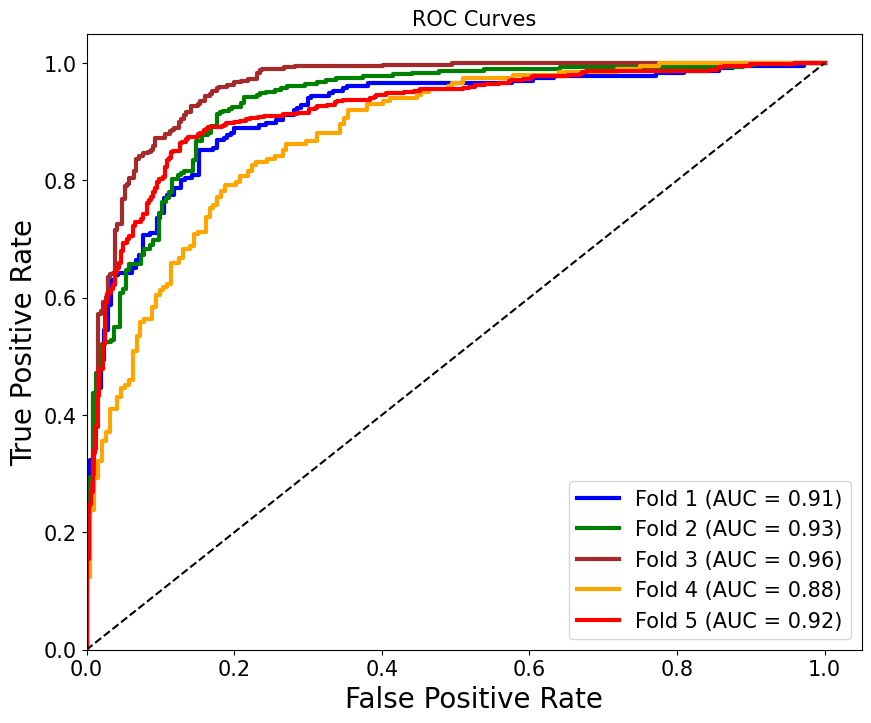

In [8]:
plt.figure(figsize=(10,8))
plt.plot(f[0], tr[0], color='blue', lw=3, label='Fold 1 (AUC = %0.2f)' % aucc[0])
plt.plot(f[1], tr[1], color='green', lw=3, label='Fold 2 (AUC = %0.2f)' % aucc[1])
plt.plot(f[2], tr[2], color='brown', lw=3, label='Fold 3 (AUC = %0.2f)' % aucc[2])
plt.plot(f[3], tr[3], color='orange', lw=3, label='Fold 4 (AUC = %0.2f)' % aucc[3])
plt.plot(f[4], tr[4], color='red', lw=3, label='Fold 5 (AUC = %0.2f)' % aucc[4])
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('ROC Curves', fontsize=15)
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

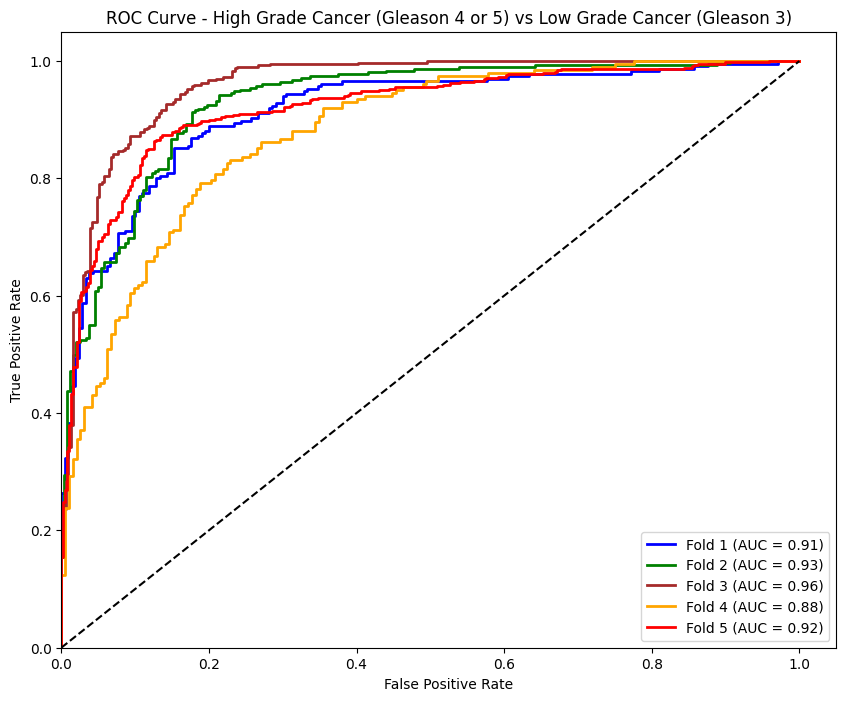

In [9]:
plt.figure(figsize=(10,8))
plt.plot(f[0], tr[0], color='blue', lw=2, label='Fold 1 (AUC = %0.2f)' % aucc[0])
plt.plot(f[1], tr[1], color='green', lw=2, label='Fold 2 (AUC = %0.2f)' % aucc[1])
plt.plot(f[2], tr[2], color='brown', lw=2, label='Fold 3 (AUC = %0.2f)' % aucc[2])
plt.plot(f[3], tr[3], color='orange', lw=2, label='Fold 4 (AUC = %0.2f)' % aucc[3])
plt.plot(f[4], tr[4], color='red', lw=2, label='Fold 5 (AUC = %0.2f)' % aucc[4])
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - High Grade Cancer (Gleason 4 or 5) vs Low Grade Cancer (Gleason 3)')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")

(array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9000000000000001, '0.9')])

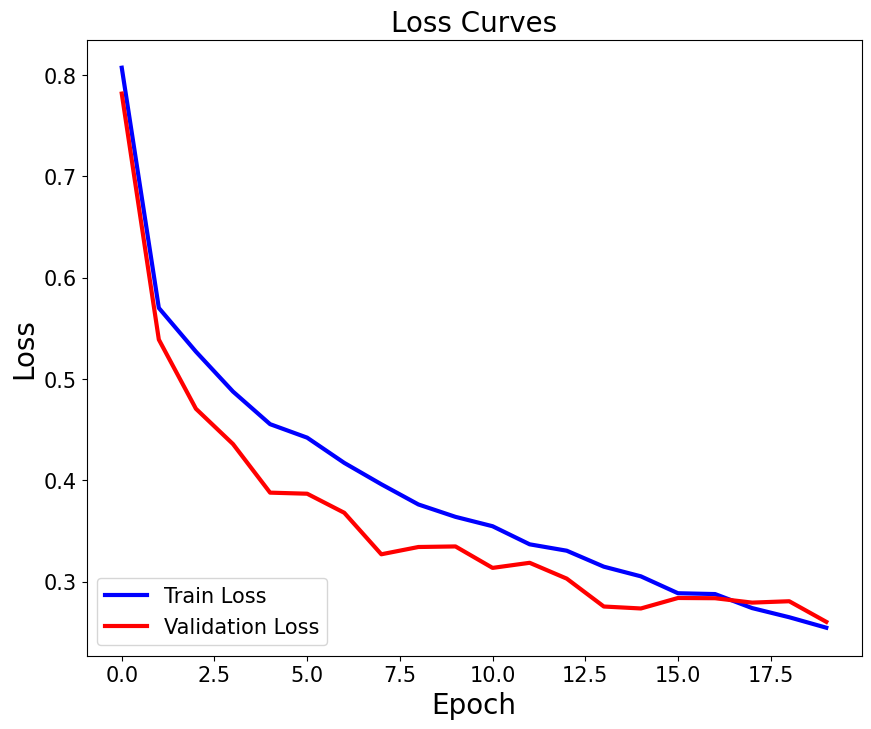

In [10]:
plt.figure(figsize=(10,8))
plt.plot(range(20), hist[2].history['loss'], color='blue', lw=3, label = 'Train Loss')
plt.plot(range(20), hist[2].history['val_loss'], color='red', lw=3,  label = 'Validation Loss')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('Loss Curves', fontsize=20)
plt.legend(loc="lower left", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

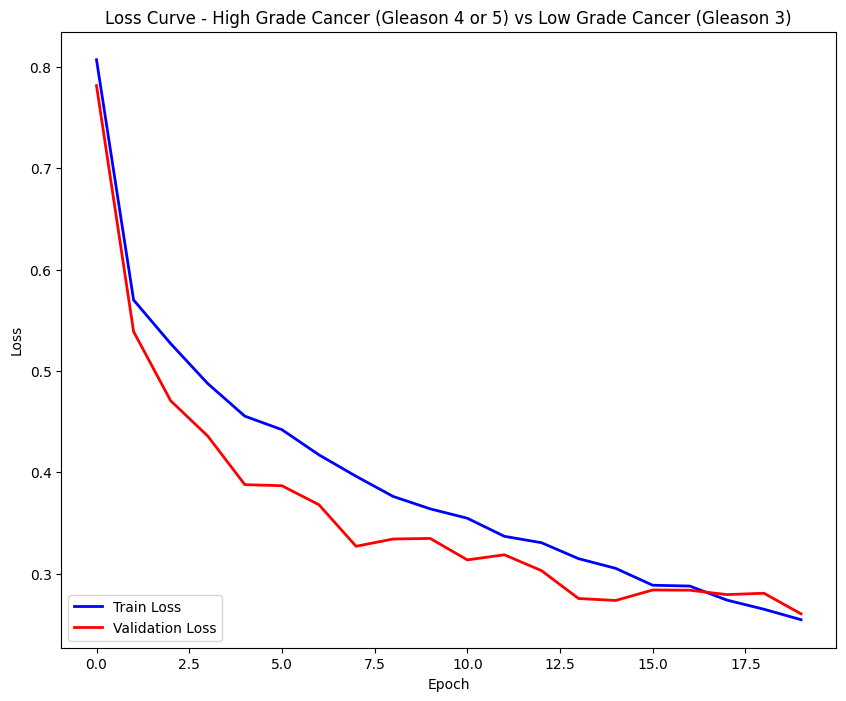

In [11]:
plt.figure(figsize=(10,8))
plt.plot(range(20), hist[2].history['loss'], color='blue', lw=2, label = 'Train Loss')
plt.plot(range(20), hist[2].history['val_loss'], color='red', lw=2,  label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve - High Grade Cancer (Gleason 4 or 5) vs Low Grade Cancer (Gleason 3)')
plt.legend(loc="lower left")

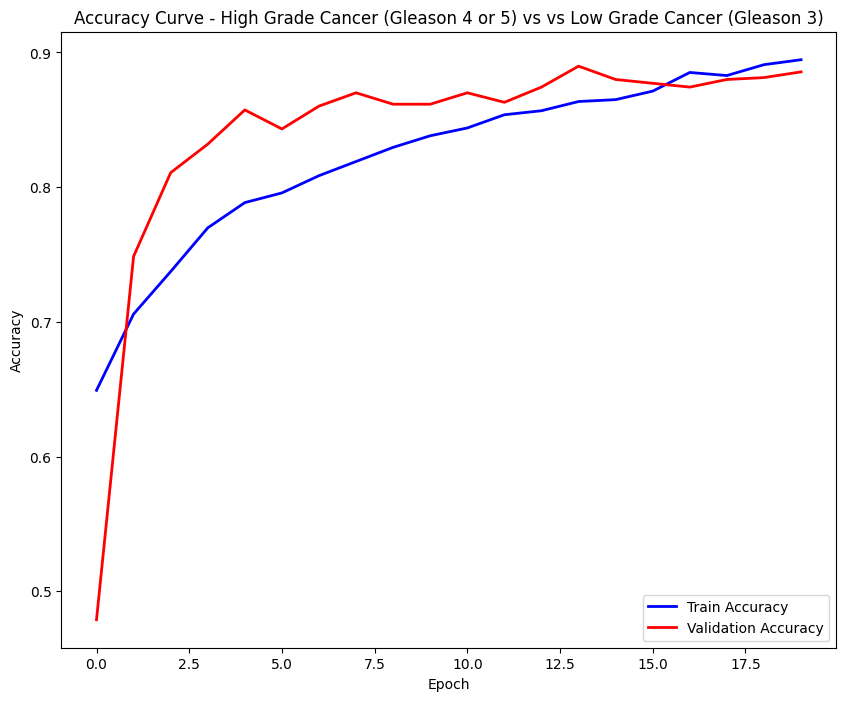

In [12]:
plt.figure(figsize=(10,8))
plt.plot(range(20), hist[2].history['accuracy'], color='blue', lw=2, label = 'Train Accuracy')
plt.plot(range(20), hist[2].history['val_accuracy'], color='red', lw=2,  label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve - High Grade Cancer (Gleason 4 or 5) vs vs Low Grade Cancer (Gleason 3)')
plt.legend(loc="lower right")

In [14]:
with open("/scratch/c.c23115040/models_tr_h_vs_d_fluor", "wb") as dill_file: 
    dill.dump(models, dill_file)

In [23]:
#acc = []
#acc2 = []
#acc3 = []
#aucc = []
#f = []
#tr = []
#listtt = []
#listtt2 = []
#thresh = []
#models = []
#hist = []
for q in range(4, 5):    
    qtr = []
    list2 = qte[q]
    for t in range(len(qte)):
        if t != q:
            qtr.append(qte[t])
    list1 = np.asarray(np.concatenate(qtr[0:4]).tolist())
    
    splitting = []
    for i in range(batch3.shape[0]):
        splitting.append(batch3[i] in list2)
    splitting = np.asarray(splitting)
    
    data_train = data[splitting == 0, 0]
    classif_train = classif3[splitting == 0].astype(np.uint8)
    data_test = data[splitting == 1, 0]
    classif_test = classif3[splitting == 1].astype(np.uint8)
    
    DRAQ5_input = np.array(DRAQ5_input).astype(np.float16)
    Eosin_input = np.array(Eosin_input).astype(np.float16)
    
    DRAQ5_input_train = DRAQ5_input[data_train, :, :].astype(np.float16)
    DRAQ5_input_test = DRAQ5_input[data_test, :, :].astype(np.float16)
    Eosin_input_train = Eosin_input[data_train, :, :].astype(np.float16)
    Eosin_input_test = Eosin_input[data_test, :, :].astype(np.float16)
    
    input_train = np.concatenate((DRAQ5_input_train[:,:,:,np.newaxis], Eosin_input_train[:,:,:,np.newaxis]), axis = 3).astype(np.float16)
    input_test = np.concatenate((DRAQ5_input_test[:,:,:,np.newaxis], Eosin_input_test[:,:,:,np.newaxis]), axis = 3).astype(np.float16)
    
    input_train_aug = []
    classif_train_aug = []
    for g in range(500):
        ran = np.random.randint(0, input_train.shape[0])
        input_train_aug.append(cv2.flip(input_train[ran], 0))
        classif_train_aug.append(classif_train[ran])
    for g in range(500):
        ran = np.random.randint(0, input_train.shape[0])
        input_train_aug.append(cv2.flip(input_train[ran], 1))
        classif_train_aug.append(classif_train[ran])
    for g in range(500):
        ran = np.random.randint(0, input_train.shape[0])
        input_train_aug.append(cv2.rotate(input_train[ran], cv2.ROTATE_90_CLOCKWISE))
        classif_train_aug.append(classif_train[ran])
    for g in range(500):
        ran = np.random.randint(0, input_train.shape[0])
        input_train_aug.append(cv2.rotate(input_train[ran], cv2.ROTATE_180))
        classif_train_aug.append(classif_train[ran])
    for g in range(500):
        ran = np.random.randint(0, input_train.shape[0])
        input_train_aug.append(cv2.rotate(input_train[ran], cv2.ROTATE_90_COUNTERCLOCKWISE))
        classif_train_aug.append(classif_train[ran])
    for g in range(500):
        ran = np.random.randint(0, input_train.shape[0])
        blurred = skimage.filters.gaussian(input_train[ran], sigma=np.random.uniform(low=0.0, high=5.0), preserve_range = True).astype(np.float16)
        input_train_aug.append(skimage.util.random_noise(blurred, mode='gaussian', var=np.random.uniform(low=0.00, high=0.50), clip = False).astype(np.float16))
        classif_train_aug.append(classif_train[ran])
    for g in range(500):
        ran = np.random.randint(0, input_train.shape[0])
        input_train_aug.append(skimage.util.random_noise(input_train[ran], mode='gaussian', var=np.random.uniform(low=0.00, high=0.50), clip = False).astype(np.float16))
        classif_train_aug.append(classif_train[ran])
        
    input_train_aug = np.array(input_train_aug).astype(np.float16)
    classif_train_aug = np.array(classif_train_aug).astype(np.uint8)
    input_train = np.concatenate((input_train, input_train_aug), axis = 0)
    classif_train = np.concatenate((classif_train, classif_train_aug), axis = 0)
    
    select = list(range(input_train.shape[0]))
    np.random.shuffle(select)
    
    input_train = input_train[select,:,:,:]
    classif_train = classif_train[select]
    
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath="/home/c.c23115040/checkpoint.model.keras", monitor='val_loss', mode='min', save_best_only=True)
    
    model = Sequential()
    model.add(layers.Conv2D(3, (3,3), padding='same', activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(), input_shape=(256, 256, 2)))
    model.add(tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(256, 256, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform()))
    
    for layer in model.layers[1].layers:
        layer.trainable = False
    
    for layer in model.layers[1].layers[168:175]:
        layer.trainable = True
      
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=['accuracy'])
    history = model.fit(input_train, classif_train, validation_data=(input_test, classif_test), epochs=10, callbacks=[model_checkpoint_callback])

    model = keras.models.load_model("/home/c.c23115040/checkpoint.model.keras")
    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(classif_test, model.predict(input_test))
    auc = sklearn.metrics.auc(fpr, tpr)
    
    acc.append(sklearn.metrics.accuracy_score(classif_test, model.predict(input_test) > 0.5))
    acc2.append(sklearn.metrics.cohen_kappa_score(classif_test, model.predict(input_test) > 0.5))
    acc3.append(sklearn.metrics.confusion_matrix(classif_test, model.predict(input_test) > 0.5))
    listtt.append(list1)
    listtt2.append(list2)
    hist.append(history)
    aucc.append(auc)
    f.append(fpr)
    tr.append(tpr)
    thresh.append(thresholds)
    models.append(model)

base_conv.py (113): Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - accuracy: 0.6416 - loss: 0.6337 - val_accuracy: 0.5505 - val_loss: 0.7470
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.7295 - loss: 0.5323 - val_accuracy: 0.7131 - val_loss: 0.5760
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.7449 - loss: 0.5167 - val_accuracy: 0.6613 - val_loss: 0.6220
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.7529 - loss: 0.5082 - val_accuracy: 0.6995 - val_loss: 0.5789
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.7751 - loss: 0.4721 - val_accuracy: 0.7204 - val_loss: 0.5621
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.7765 - loss: 0.4668 - val_accuracy: 0.7315 - val_loss: 0.5531
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.7711 - loss: 0.4656 - val_accuracy: 0.7278 - val_loss: 0.5641
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.8023 - loss: 0.4351 - val_accu

In [24]:
acc

[0.750561797752809,
 0.677536231884058,
 0.8559322033898306,
 0.7157360406091371,
 0.7315270935960592]

In [25]:
acc2

[0.49941727894603494,
 0.34858188472095153,
 0.7081592240856739,
 0.4321305399701447,
 0.45533203281250967]

In [26]:
acc3

[array([[154,  56],
        [ 55, 180]]),
 array([[159,  84],
        [ 94, 215]]),
 array([[263,  48],
        [ 54, 343]]),
 array([[143,  49],
        [ 63, 139]]),
 array([[248, 117],
        [101, 346]])]

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

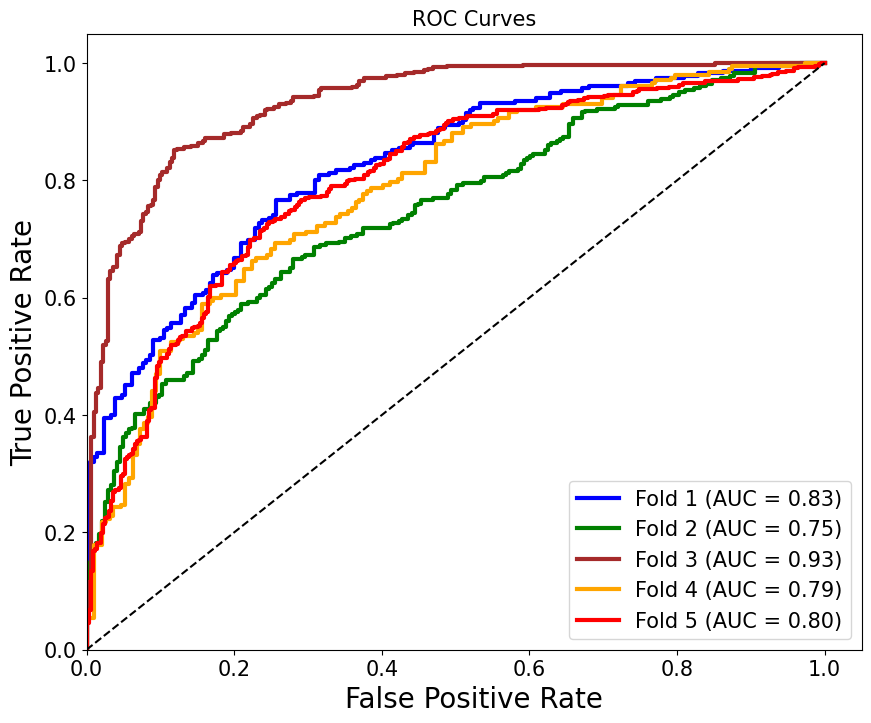

In [27]:
plt.figure(figsize=(10,8))
plt.plot(f[0], tr[0], color='blue', lw=3, label='Fold 1 (AUC = %0.2f)' % aucc[0])
plt.plot(f[1], tr[1], color='green', lw=3, label='Fold 2 (AUC = %0.2f)' % aucc[1])
plt.plot(f[2], tr[2], color='brown', lw=3, label='Fold 3 (AUC = %0.2f)' % aucc[2])
plt.plot(f[3], tr[3], color='orange', lw=3, label='Fold 4 (AUC = %0.2f)' % aucc[3])
plt.plot(f[4], tr[4], color='red', lw=3, label='Fold 5 (AUC = %0.2f)' % aucc[4])
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('ROC Curves', fontsize=15)
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65]),
 [Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45000000000000007, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.6500000000000001, '0.65')])

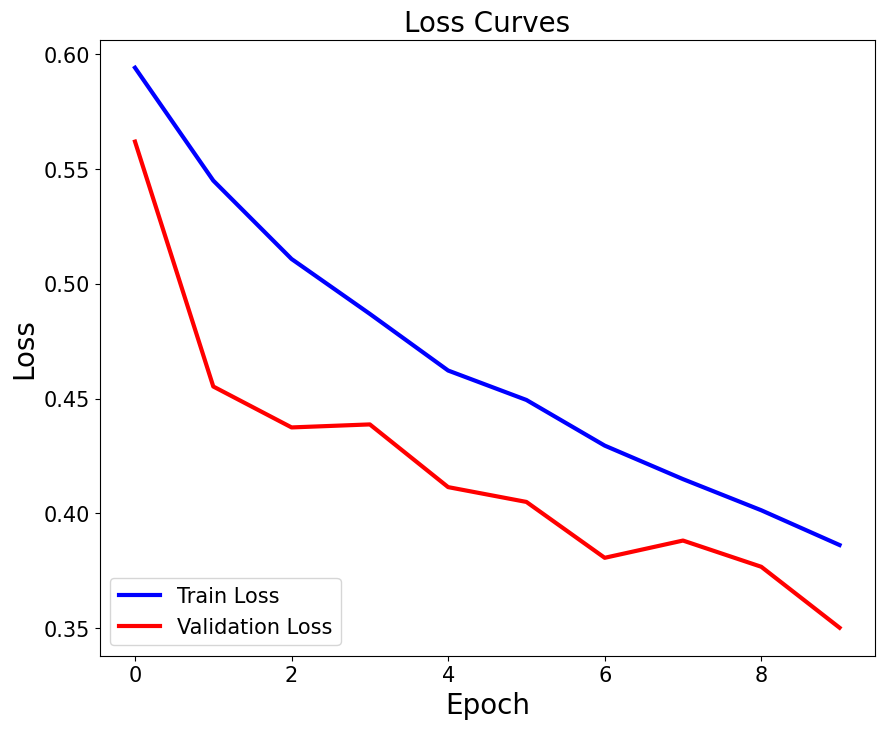

In [28]:
plt.figure(figsize=(10,8))
plt.plot(range(10), hist[2].history['loss'], color='blue', lw=3, label = 'Train Loss')
plt.plot(range(10), hist[2].history['val_loss'], color='red', lw=3,  label = 'Validation Loss')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('Loss Curves', fontsize=20)
plt.legend(loc="lower left", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

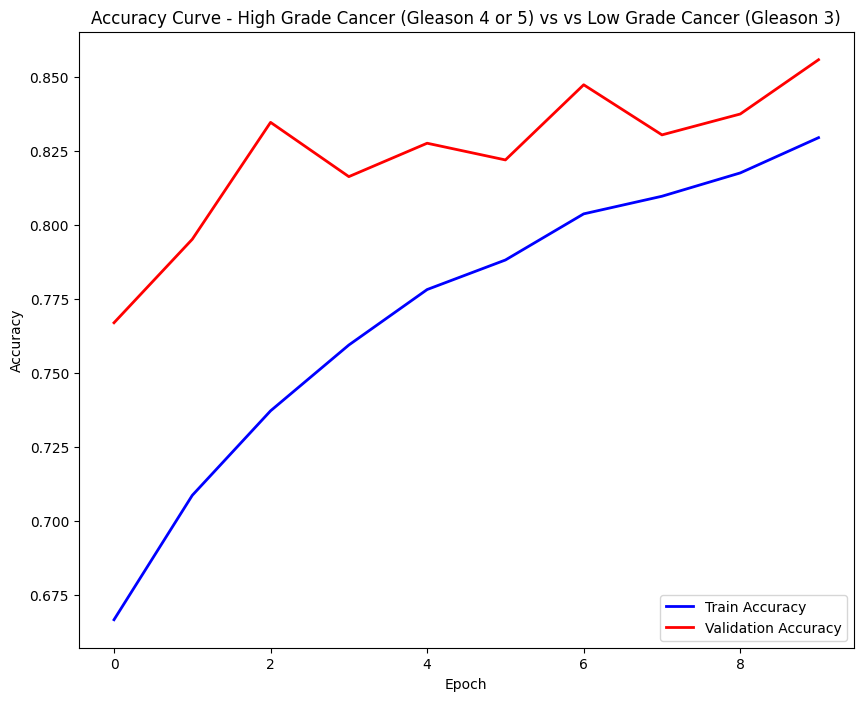

In [29]:
plt.figure(figsize=(10,8))
plt.plot(range(10), hist[2].history['accuracy'], color='blue', lw=2, label = 'Train Accuracy')
plt.plot(range(10), hist[2].history['val_accuracy'], color='red', lw=2,  label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve - High Grade Cancer (Gleason 4 or 5) vs vs Low Grade Cancer (Gleason 3)')
plt.legend(loc="lower right")

In [31]:
with open("/scratch/c.c23115040/models_tr_h_vs_d_imagenet", "wb") as dill_file: 
    dill.dump(models, dill_file)